<a href="https://colab.research.google.com/github/mishka832/Autism-Prediction/blob/main/Autism_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [349]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [350]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [351]:
df=pd.read_csv('/content/drive/MyDrive/train.csv')

In [352]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [354]:
# there are mainly two numerical attributes rest are all categorical attributes
#age is in type float when theres no point of float age so we convert it to int
df['age']=df['age'].astype(int)

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    int64  
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [356]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [357]:
# numerical attributes- are age and result
numerical_attributes=['ID','result','age']
for column in df.columns:
  if column not in numerical_attributes:
    print(column)
    print(df[column].unique())


A1_Score
[1 0]
A2_Score
[0 1]
A3_Score
[1 0]
A4_Score
[0 1]
A5_Score
[1 0]
A6_Score
[0 1]
A7_Score
[1 0]
A8_Score
[0 1]
A9_Score
[1 0]
A10_Score
[1 0]
gender
['f' 'm']
ethnicity
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
jaundice
['no' 'yes']
austim
['no' 'yes']
contry_of_res
['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']
used_app_bef

In [358]:
#through this we understand all age values are 18 or more and id column is useless so we can drop it
df=df.drop(columns=['ID','age_desc'])

In [359]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [360]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


1. There are missing values which are represented as '?'
2. There can be some outliers
3. OverSampling needs to be done as their is class imbalance
4. We can drop age_desc and ID Column as they were of no use
5. For Categorical Attributes if mean values are closer to zero then there are more number ofzeroes than ones also if theres a slight diff between mean and median the distribution is not normal (age)

Mean:  27.96375
Median:  24.0


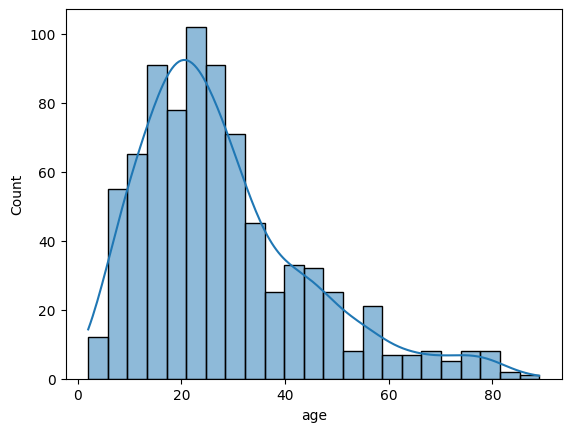

In [361]:
# age and result as seen it is not a normal distribution we can plot graphs further to visualise it
sns.histplot(df['age'],kde=True) #right skewed means mean>median
print('Mean: ',np.mean(df['age']))
print('Median: ',np.median(df['age']))

Mean:  8.537303106501248
Median:  9.605299308


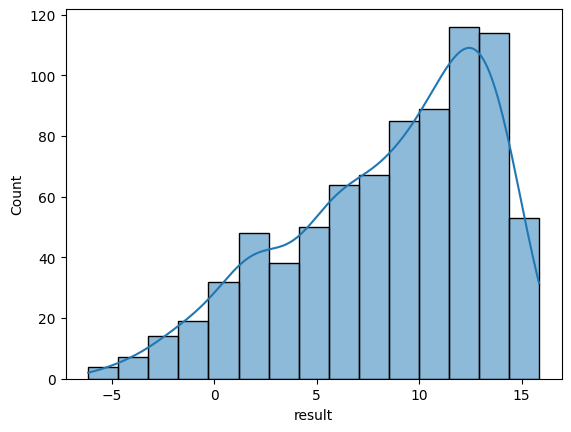

In [362]:
sns.histplot(df['result'],kde=True) #left skewed means mean<median
print('Mean: ',np.mean(df['result']))
print('Median: ',np.median(df['result']))

<Axes: xlabel='age'>

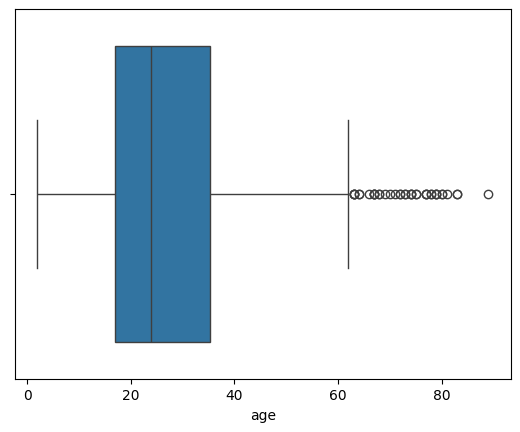

In [363]:
# box plots to visualise the outliers
sns.boxplot(x=df['age'])

<Axes: xlabel='result'>

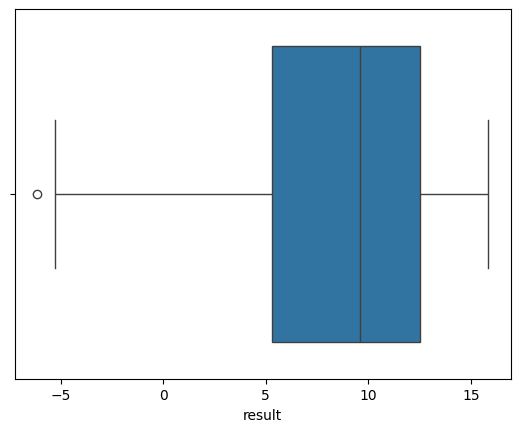

In [364]:
sns.boxplot(x=df['result'])

In [365]:
# identify the outliers using the terkeys inter quantile range
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound,upper_bound)
age_outliers=df.loc[(df['age']<lower_bound) | (df['age']>upper_bound)]
print(len(age_outliers))
age_outliers.head()



-10.375 62.625
39


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0


In [366]:
Q1=df['result'].quantile(0.25)
Q3=df['result'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound,upper_bound)
result_outliers=df.loc[(df['result']<lower_bound) | (df['result']>upper_bound)]
print(len(result_outliers))
result_outliers.head()


-5.5052896818749995 23.326348605125
1


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
698,0,0,0,0,0,0,0,0,0,0,62,f,Asian,no,no,Jordan,no,-6.137748,Self,0


Since we have lots of outliers tree based models shud be a preferrable option instead of neural networks,logistic regression,knns etc which are more sensitive to outliers

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


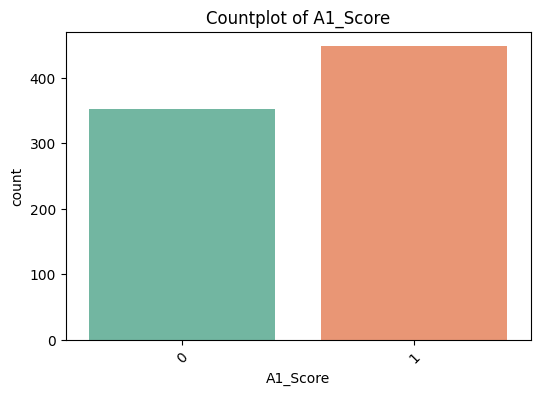

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


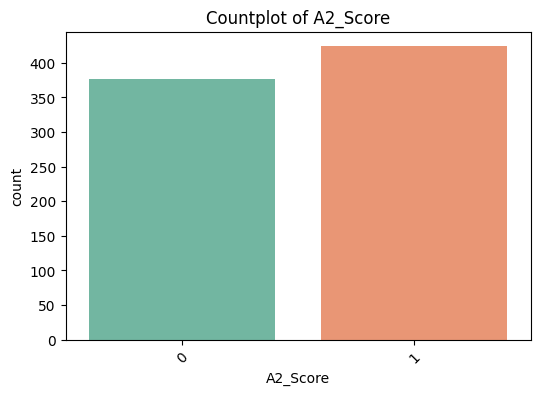

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


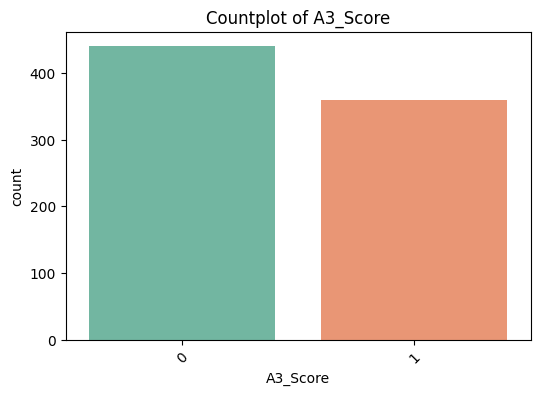

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


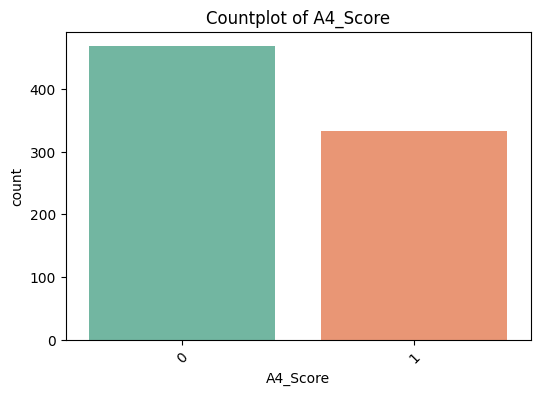

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


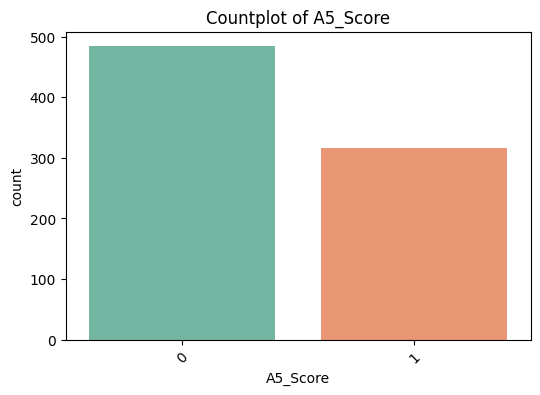

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


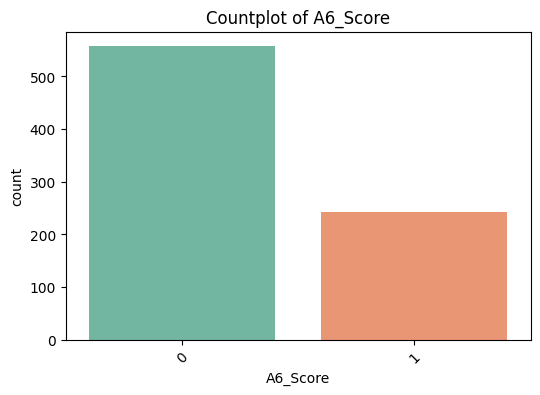

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


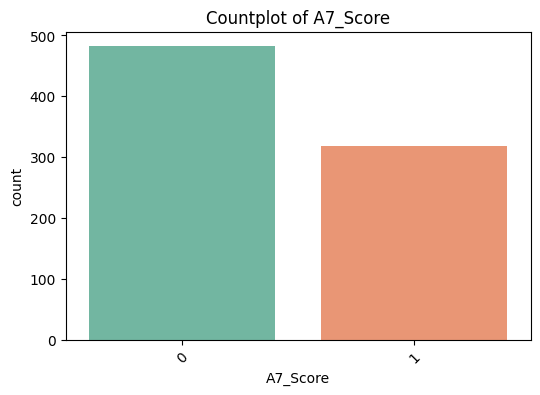

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


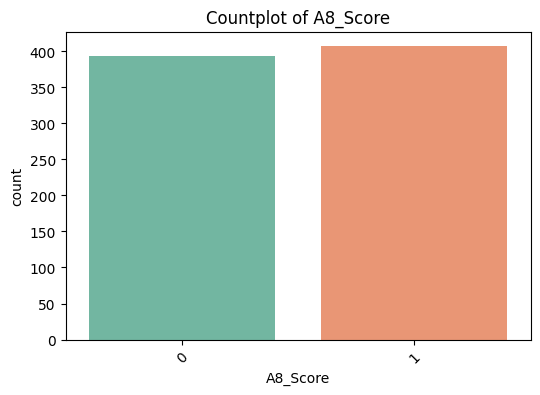

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


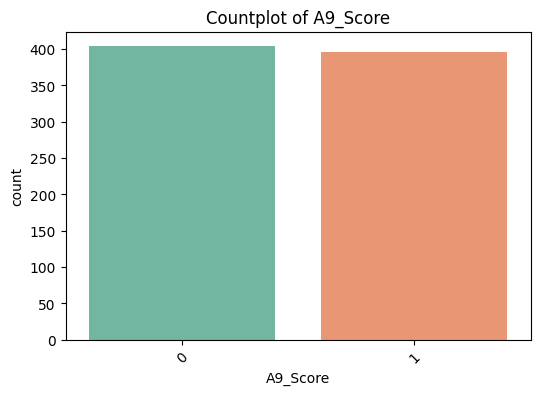

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


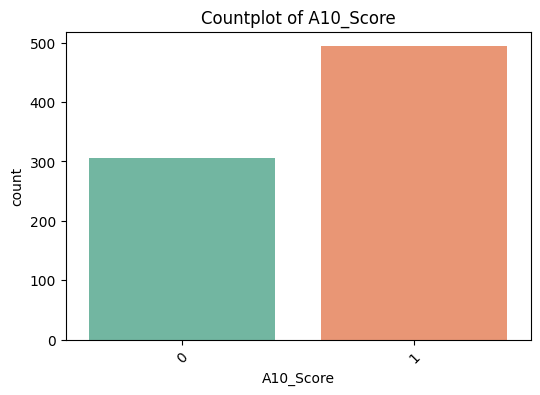

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


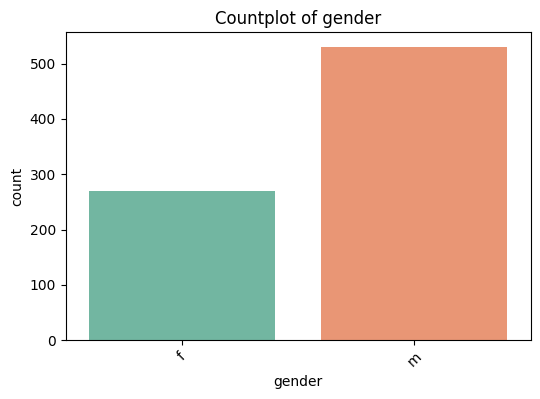

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


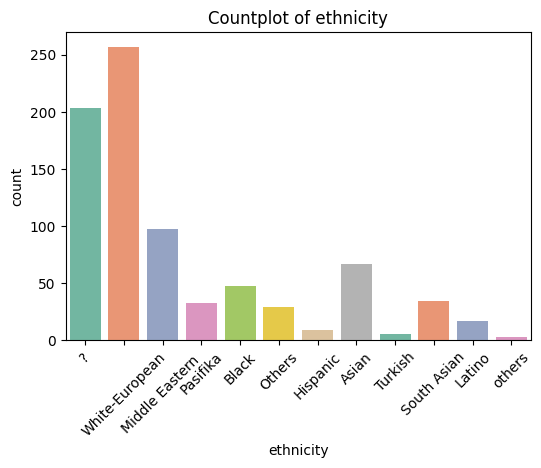

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


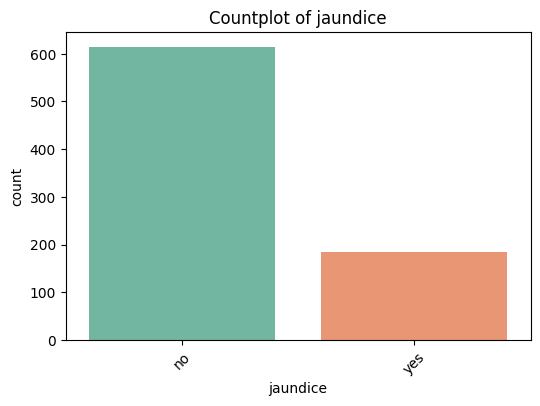

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


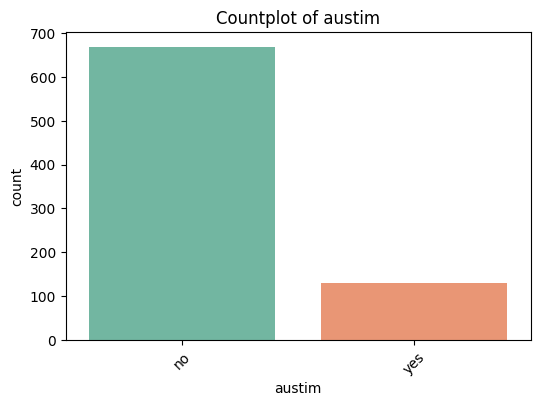

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


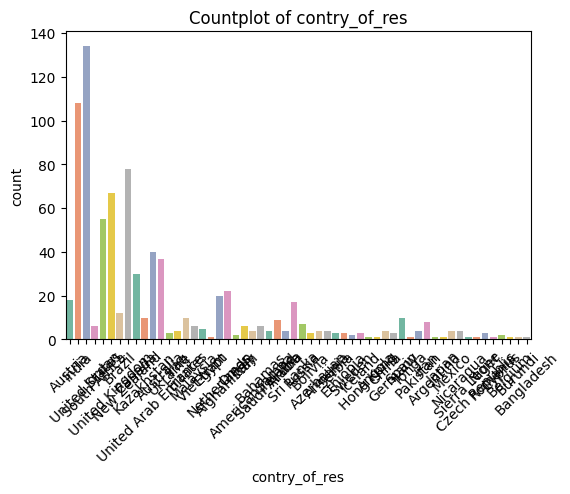

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


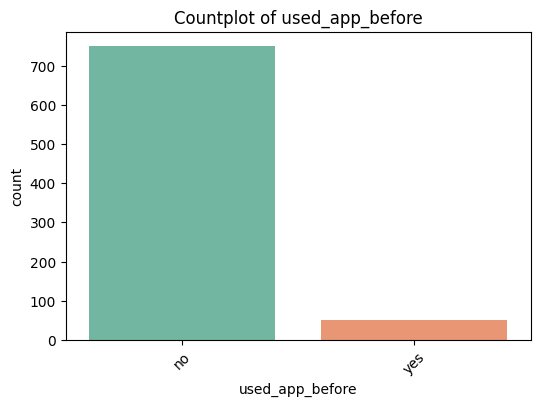

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


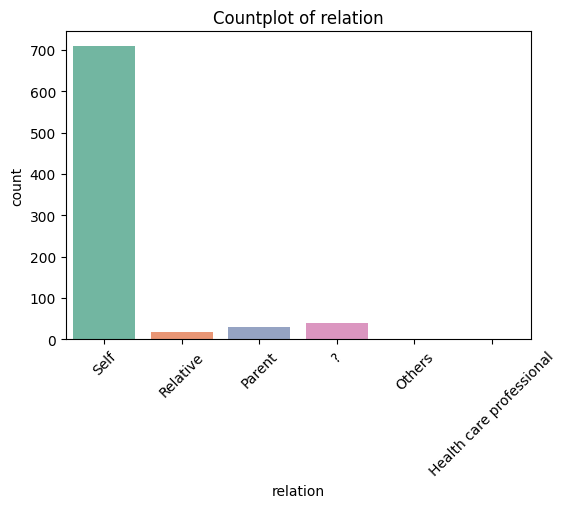

/tmp/ipython-input-4262418746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="Set2")


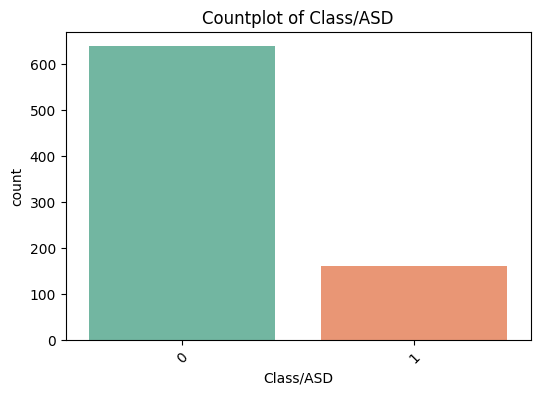

In [367]:
# analysis of categorical attributes
numerical_attributes=['age','result']
for column in df.columns:
  if column not in numerical_attributes:
       plt.figure(figsize=(6,4))   # new figure for each column
       sns.countplot(x=column, data=df, palette="Set2")
       plt.title(f"Countplot of {column}")
       plt.xticks(rotation=45)     # rotate labels if needed
       plt.show()


In [368]:
# in countplot of relation relative,parent, ? Others, HealthCare proffesoonal are so low we could just add in Others
# also we need to replace ? in others also those values which are labelled wrong as others shud also be named as Others
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [369]:
df['relation'].replace({
    '?':'Others',
    'Relative':'Others',
    'Parent':'Others',
    'Health care professional':'Others'
},inplace=True)

/tmp/ipython-input-2555414691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['relation'].replace({


In [370]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [371]:
df['ethnicity'].replace({
    '?':'Others',
    'others':'Others'
},inplace=True)

/tmp/ipython-input-3087845935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ethnicity'].replace({


In [372]:
df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

/tmp/ipython-input-1227764549.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ethnicity',data=df,palette='Set2')


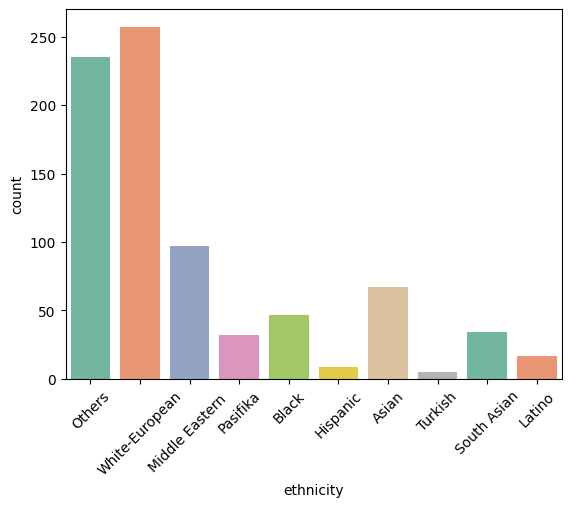

In [373]:
sns.countplot(x='ethnicity',data=df,palette='Set2')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2458412140.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='relation',data=df,palette='Set2')


<Axes: xlabel='relation', ylabel='count'>

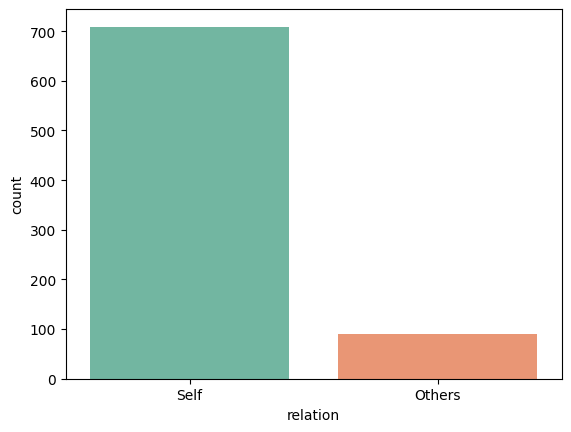

In [374]:
sns.countplot(x='relation',data=df,palette='Set2')


In [375]:
# string values we have to encode rest all are already encoded
objects=df.select_dtypes(include='object').columns
print(objects)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [376]:
encoders={}
for column in objects:
  encoder=LabelEncoder()
  df[column]=encoder.fit_transform(df[column])
  encoders[column]=encoder

with open('encoders.pkl','wb') as f:
  pickle.dump(encoders,f)

In [377]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,7,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,25,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,54,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,54,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,46,0,-4.777286,1,0


In [378]:
corr=df.corr()

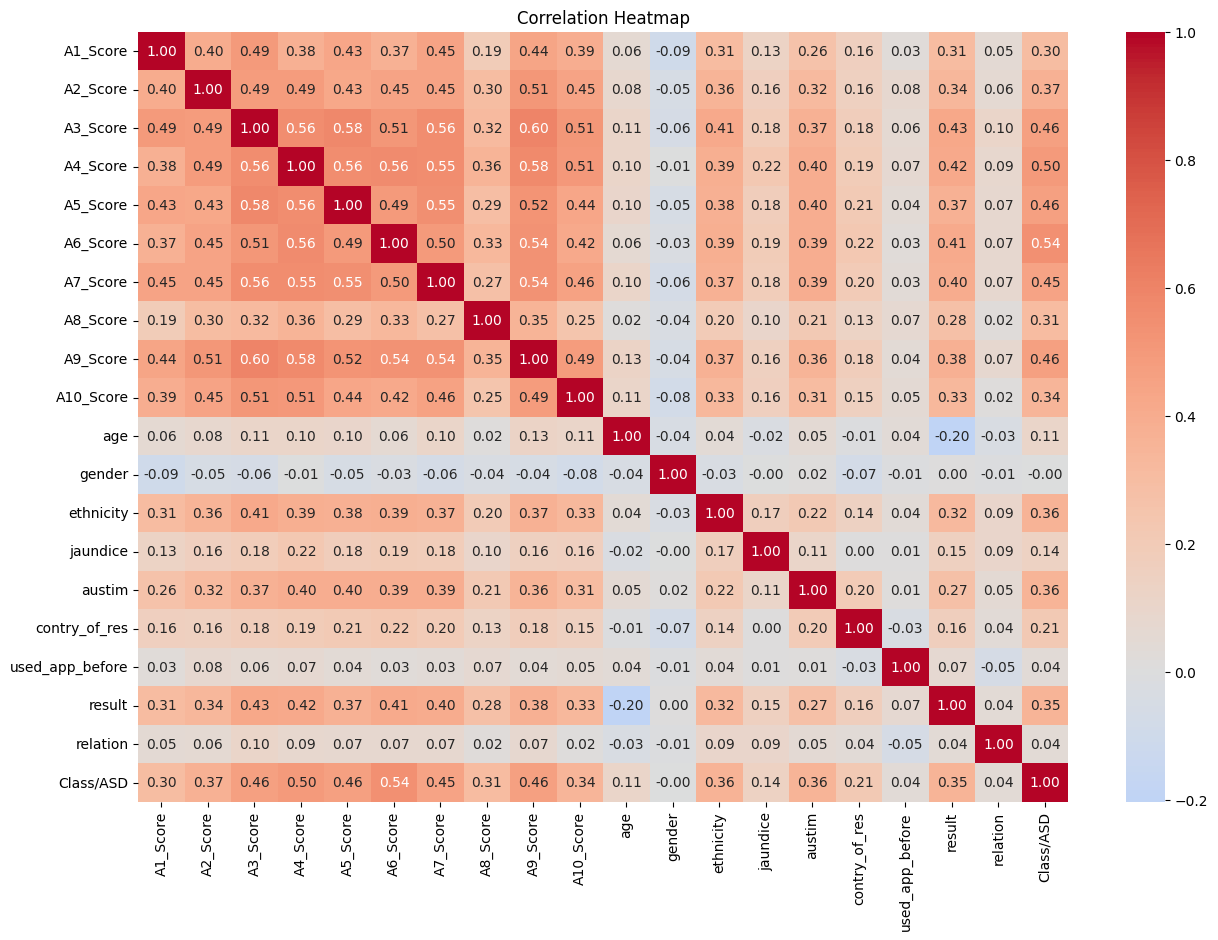

In [379]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [380]:
# no highly correlated features hence no feature extraction can be performed as such however we can see gender is not influencing the class as such abd used app before is also not


In [381]:
age_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0
93,0,0,0,0,0,0,0,0,0,0,79,m,?,no,no,India,no,7.813125,Self,0
161,1,1,1,1,1,1,1,1,1,1,79,f,White-European,yes,yes,United States,no,10.482143,Self,0
231,1,1,1,1,1,1,1,1,1,1,69,f,White-European,no,no,United States,no,2.459004,Self,1
238,1,1,1,1,1,0,1,1,1,1,64,f,Latino,yes,no,Australia,no,13.756476,Self,1
241,0,0,0,0,0,0,0,0,1,0,64,f,others,no,no,Jordan,no,2.142376,Self,0


In [382]:
# we can replace the age outliers with the median and also the result outliers with median
# age_median=np.median(df['age'])


In [383]:
df['age'].unique()

array([38, 47,  7, 23, 43, 31, 28, 26, 48, 24, 21,  9, 56, 29, 14, 72, 25,
       15, 41, 54, 12, 30, 74, 67, 22, 11, 44, 35, 17, 18,  6, 46, 42, 51,
       13, 16, 37, 19, 32, 49, 36, 75, 79, 34, 55, 57, 27, 61, 10, 58,  8,
       33, 20, 40,  3, 45, 69, 64, 39, 78, 60, 63,  2, 77, 53,  5, 68, 62,
       81, 50, 73, 80,  4, 70, 83, 89, 52, 71, 66])

In [384]:
df['age']

,age
0,38
1,47
2,7
3,23
4,43
...,...
795,16
796,20
797,5
798,16


In [385]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_age=df['age'].median()
df.loc[(df['age']<lower_bound) | (df['age']>upper_bound),'age']=median_age

In [386]:
df['age'].unique()

array([38, 47,  7, 23, 43, 31, 28, 26, 48, 24, 21,  9, 56, 29, 14, 25, 15,
       41, 54, 12, 30, 22, 11, 44, 35, 17, 18,  6, 46, 42, 51, 13, 16, 37,
       19, 32, 49, 36, 34, 55, 57, 27, 61, 10, 58,  8, 33, 20, 40,  3, 45,
       39, 60,  2, 53,  5, 62, 50,  4, 52])

In [387]:
new_outliers=df.loc[(df['age']<lower_bound) | (df['age']>upper_bound)]
print(len(new_outliers))

0


In [388]:
# replacing the result outliers with median
result_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
698,0,0,0,0,0,0,0,0,0,0,62,f,Asian,no,no,Jordan,no,-6.137748,Self,0


In [389]:
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_result=df['result'].median()
df.loc[(df['result']<lower_bound) | (df['result']>upper_bound),'result']=median_result

In [390]:
result_outliers=df.loc[(df['result']<lower_bound) | (df['result']>upper_bound)]
print(len(result_outliers))

0


**DATA PREPROCESSING**

In [391]:
# splitting the data into test train
df.shape

(800, 20)

In [392]:
x=df.drop(columns=['Class/ASD'])
y=df['Class/ASD']

In [393]:
x.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,7,0,6.351166,1
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,25,0,2.255185,1
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,54,0,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,54,0,2.276617,1
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,46,0,-4.777286,1


In [394]:
y.head()

,Class/ASD
0,0
1,0
2,1
3,0
4,0


In [395]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [396]:
X_train.shape

(640, 19)

In [397]:
X_test.shape

(160, 19)

In [398]:
Y_train.shape

(640,)

In [399]:
Y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [400]:
Y_test.value_counts()

,count
Class/ASD,
0,124
1,36


In [401]:
# over sampling (SMOTE)
smote=SMOTE(random_state=42)
X_train_resampled,Y_train_resampled=smote.fit_resample(X_train,Y_train)

In [402]:
Y_train_resampled.shape

(1030,)

In [403]:
Y_train_resampled.value_counts()

,count
Class/ASD,
1,515
0,515


In [404]:
#MODEL TRAINING
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xgboost=XGBClassifier(random_state=42)

In [405]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],          # How to measure split quality
    'max_depth': [None, 5, 10, 15, 20],        # Max tree depth
    'min_samples_split': [2, 5, 10],           # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],             # Min samples at leaf node
    'max_features': [None, 'sqrt', 'log2']     # Number of features to consider at each split
}
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],       # Number of trees
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],    # Features considered for each split
    'bootstrap': [True, False]                 # Whether to use bootstrap samples
}
param_grid_xgb = {
    'n_estimators': [50, 100, 200, 300],       # Number of boosting rounds
    'max_depth': [3, 5, 7, 10],                # Max depth of a tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],             # Fraction of data for each tree
    'colsample_bytree': [0.6, 0.8, 1.0],       # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2, 0.5],               # Minimum loss reduction for a split
    'reg_alpha': [0, 0.01, 0.1],               # L1 regularization
    'reg_lambda': [1, 1.5, 2]                  # L2 regularization
}

In [406]:
random_dt=RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=10,cv=5,verbose=2,random_state=42,scoring='accuracy')
random_rf=RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf,n_iter=10,cv=5,verbose=2,random_state=42,scoring='accuracy')
random_xgb=RandomizedSearchCV(estimator=xgboost,param_distributions=param_grid_xgb,n_iter=10,cv=5,verbose=2,random_state=42,scoring='accuracy')

In [407]:
random_dt.fit(X_train_resampled,Y_train_resampled)
random_rf.fit(X_train_resampled,Y_train_resampled)
random_xgb.fit(X_train_resampled,Y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=10; total time=   0.

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [408]:
best_model=None
best_score=0
if random_dt.best_score_>best_score:
  best_score=random_dt.best_score_
  best_model=random_dt.best_estimator_
if random_rf.best_score_>best_score:
  best_score=random_rf.best_score_
  best_model=random_rf.best_estimator_
if random_xgb.best_score_>best_score:
  best_score=random_xgb.best_score_
  best_model=random_xgb.best_estimator_

In [409]:
print(best_score)
print(best_model)

0.9194174757281554
RandomForestClassifier(bootstrap=False, criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)


In [410]:
with open("model.pkl", "wb") as f:
  pickle.dump(best_model, f)

In [411]:
y_pred=best_model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.83125

In [412]:
confusion_matrix(Y_test,y_pred)

array([[108,  16],
       [ 11,  25]])

In [413]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(Y_test,y_pred)
# recall_score(Y_test,y_pred)
# f1_score(Y_test,y_pred)

0.6097560975609756

In [414]:
recall_score(Y_test,y_pred)

0.6944444444444444

In [415]:
f1_score(Y_test,y_pred)

0.6493506493506493

In [416]:
import joblib

# Load saved model and encoders/scalers
model = joblib.load("model.pkl")
encoders = joblib.load("encoders.pkl")

In [417]:
numerical_attributes=['age','result']
for column in df.columns:
  if column not in numerical_attributes:
    print(column)
    print(df[column].unique())

A1_Score
[1 0]
A2_Score
[0 1]
A3_Score
[1 0]
A4_Score
[0 1]
A5_Score
[1 0]
A6_Score
[0 1]
A7_Score
[1 0]
A8_Score
[0 1]
A9_Score
[1 0]
A10_Score
[1 0]
gender
[0 1]
ethnicity
[5 9 4 6 1 2 0 8 7 3]
jaundice
[0 1]
austim
[0 1]
contry_of_res
[ 7 25 54 46 31 53 13 36 15 32 52  6 51 27 21 33 55 19 35  0 39 29  1  9
 43 28  5 48 42 12  8  4 44 20 49 24 23  2 16 22 47 50 40 26  3 30 34 37
 45 18 38 41 17 11 14 10]
used_app_before
[0 1]
relation
[1 0]
Class/ASD
[0 1]


In [418]:
test_df=pd.read_csv('/content/drive/MyDrive/test.csv')

In [419]:
test_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [420]:
def preprocessing(df, encoders, scaler=None):
    # Drop irrelevant columns
    df = df.drop(columns=['ID','age_desc'], errors='ignore')

    # Age as int
    df['age'] = df['age'].astype(int)

    # Columns with special replacement
    df['relation'] = df['relation'].replace({'?':'Others','Relative':'Others','Parent':'Others','Health care professional':'Others'})
    df['ethnicity'] = df['ethnicity'].replace({'?':'Others','others':'Others'})

    # Make sure **all categorical columns** have only known classes
    categorical_cols = df.select_dtypes(include='object').columns
    for col in categorical_cols:
        df[col] = df[col].apply(lambda x: x if x in encoders[col].classes_ else 'Others')

    # Encode all categorical columns
    for col in categorical_cols:
        df[col] = encoders[col].transform(df[col])
    return df


In [421]:
test_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [422]:
numerical_attributes=['age','result','ID']
for column in test_df.columns:
  if column not in numerical_attributes:
    print(column)
    print(test_df[column].unique())

A1_Score
[1 0]
A2_Score
[1 0]
A3_Score
[0 1]
A4_Score
[0 1]
A5_Score
[1 0]
A6_Score
[1 0]
A7_Score
[0 1]
A8_Score
[0 1]
A9_Score
[1 0]
A10_Score
[1 0]
gender
['m' 'f']
ethnicity
['White-European' 'Asian' '?' 'Middle Eastern ' 'South Asian' 'Pasifika'
 'Turkish' 'Latino' 'Black' 'Others' 'Hispanic']
jaundice
['yes' 'no']
austim
['no' 'yes']
contry_of_res
['India' 'Mexico' 'Egypt' 'Italy' 'Australia' 'United States' 'Jordan'
 'Burundi' 'United Kingdom' 'Canada' 'Germany' 'Russia' 'Spain' 'Austria'
 'Iran' 'New Zealand' 'Bolivia' 'United Arab Emirates' 'Uruguay' 'Lebanon'
 'France' 'Netherlands' 'Bahamas' 'Iceland' 'Sri Lanka' 'Afghanistan'
 'Pakistan' 'Malaysia' 'Aruba' 'Ireland' 'Viet Nam' 'Tonga' 'Philippines'
 'Azerbaijan' 'Czech Republic']
used_app_before
['no' 'yes']
age_desc
['18 and more']
relation
['Self' 'Parent' '?' 'Relative' 'Others' 'Health care professional']


In [423]:
import numpy as np

# Suppose encoders is a dict of LabelEncoders
for col in encoders:
    # Check if 'Others' already present
    if 'Others' not in encoders[col].classes_:
        # Append 'Others' to classes_
        encoders[col].classes_ = np.append(encoders[col].classes_, 'Others')

In [424]:
test_df=preprocessing(test_df,encoders,model)

In [425]:
test_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
0,1,1,0,0,1,1,0,0,1,1,15,1,9,1,0,25,0,12.399055,1
1,1,0,0,0,0,0,0,1,0,0,27,1,0,0,0,34,0,6.551598,1
2,1,1,1,0,1,1,0,1,1,1,31,1,9,1,0,19,0,3.180663,1
3,0,0,0,0,0,0,0,0,0,0,25,1,5,0,0,25,0,2.220766,1
4,0,0,0,1,0,0,0,0,0,0,9,1,5,0,0,29,0,7.252028,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,1,0,0,1,0,0,1,1,1,23,1,1,0,0,8,0,-1.915659,1
196,1,0,0,0,0,0,0,0,0,1,13,1,5,0,0,25,0,0.520234,1
197,1,0,0,0,0,0,1,0,1,1,22,1,5,0,0,36,0,3.498948,0
198,0,1,0,0,0,0,0,1,0,1,24,0,5,0,0,54,0,5.594550,1


In [426]:
predictions=model.predict(test_df)
probabilities = model.predict_proba(test_df)

print("Predictions:", predictions)
print("Probabilities:\n", probabilities)

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Probabilities:
 [[0.54379819 0.45620181]
 [0.9975     0.0025    ]
 [0.81007272 0.18992728]
 [1.         0.        ]
 [0.96027083 0.03972917]
 [0.99106061 0.00893939]
 [0.57427383 0.42572617]
 [0.93833333 0.06166667]
 [1.         0.        ]
 [0.9925     0.0075    ]
 [1.         0.        ]
 [0.65814286 0.34185714]
 [0.96510714 0.03489286]
 [0.35517111 0.64482889]
 [0.87433333 0.12566667]
 [0.28402978 0.71597022]
 [0.5199156  0.4800844 ]
 [0.15275381 0.84724619]
 [1.         0.        ]
 [0.97391667 0.02608333]
 [0.30761406 0.69238594]
 [0.53874743 0.46125257]
 [0.100956   0